<a href="https://colab.research.google.com/github/yexf308/AdvancedMachineLearning/blob/main/Homework/HW4/HW4Q1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline 
import numpy.linalg as LA
from time import time
import pandas as pd
import os 


Populating the interactive namespace from numpy and matplotlib


# Advanced Machine Learning
# Homework 4
## Homework guideline

- The deadline is May 5th 10:30am. Submission after the deadline will not be graded. 

- Q1-4 are individual homework. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- For group homework, only one submission is needed and other group members just need to mention which group belong to.  

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources.

- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

$\def\m#1{\mathbf{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$

# Q1: Theory

## Q1.1 LLE (10pt)
The local covariance matrix $C$ for the particular data point $\m{x}$ is defined as 
$$ C_{jk}=(\m{x}-\eta^{(j)})^\top (\m{x}-\eta^{(k)}) $$
where $\{\eta^{(j)}\}_{j=1}^K$ is $K$-nearest neighbours of $\m{x}$. 

### Q1.1.1 Faster implementation
A much faster way to calculate $C$ is 
\begin{align}
C_{jk} = \frac{1}{2}(D_j+D_k -D_{jk})
\end{align}
where $D_{jk}$ is the square distance between $j$th and $k$th neighbours of $\m{x}$, $D_j$ is the square distance between $\m{x}$ and its $j$-th neighbour.
It requires significantly less user input than the complete matrix of pairwise distances. **Show** this implementation is exactly the local covariance matrix.  


# Your solution:



---
### Q1.1.2: (optional) More involved analysis
- Please estimate the upper bound and lower bound percentage of the data entries in the matrix $D$ is used. 

- It is NOT possible to recover manifold structure from even less user input—say, just the pairwise distances between each data point and its nearest neighbor. Please give a counter example. 




# Your solution:



---



## Q1.2 t-SNE (15pt)
- In SNE, the objective function is 
$L(\m{Z}) =\sum_{i}\sum_j P_{j|i}\log\frac{P_{j|i}}{Q_{j|i}}.$

 **Show** the gradient for each embedding vector
\begin{align}
\nabla_{\m{z}^{(i)}} L(\m{Z})= 2\sum_j (\m{z}^{(i)}-\m{z}^{(j)})(P_{j|i}-Q_{j|i}+P_{i|j}-Q_{i|j})
\end{align}

- In symmetric SNE, define 
$P_{ij} = \frac{P_{i|j}+P_{j|i}}{2N}, \ Q_{ij} = \frac{Q_{i|j}+Q_{j|i}}{2N}.$
The objective function is 
$L(\m{Z}) = \sum_{i\ne j} P_{ij}\log\frac{P_{ij}}{Q_{ij}}$.

 **Show** the gradient is 
\begin{align}
\nabla_{\m{z}^{(i)}} L(\m{Z}) =4\sum_j (\m{z}^{(i)}-\m{z}^{(j)})(P_{ij}-Q_{ij})
\end{align}

- In t-SNE, refine $Q_{ij}$ as $Q_{ij}= \frac{(1+\|\m{z}^{(i)}-\m{z}^{(j)}\|^2)^{-1}}{\sum_{k\ne l} (1+\|\m{z}^{(k)}-\m{z}^{(l)}\|^2)^{-1}}$ and leave $P_{ij}$ as is. 

 **Show** the gradient is 
\begin{align}
\nabla_{\m{z}^{(i)}} L(\m{Z}) =4\sum_j (\m{z}^{(i)}-\m{z}^{(j)})(P_{ij}-Q_{ij})(1+\|\m{z}^{(i)}-\m{z}^{(j)}\|^2)^{-1}
\end{align}

# Your solution:

# Q2: t-SNE: early exaggeration (50pt)
One difficulty is that the speed with which t-SNE algorithm converges slows down as the number of points $N$ increases. The algorithm requires many more iterations to converge. In the original paper by Van der Maaten and Hinton, they proposes one way to improve the optimization is called "early exaggeration", 
**multiply all of the $p_{ij}$ by $\alpha$ in the initial stages of the optimization.** In their later paper (2014), 

   "During the first 250 learning iterations, we multiplied all $p_{ij}$ values by
a user-defined constant $\alpha  > 1$. [. . .] this trick enables t-SNE to find a
better global structure in the early stages of the optimization by creating
very tight clusters of points that can easily move around in the embedding
space. In preliminary experiments, we found that this trick becomes
increasingly important to obtain good embeddings when the data set size increases, as it becomes harder for the optimization to
find a good global structure when there are more points in the embedding
because there is less space for clusters to move around. In our experiments,
we fix $\alpha$  = 12." 

### Q2.1: Different parameters
We will perform the early exaggeration methods on the following fashion MNIST dataset. 

- We will first try with the classical parameter: $\alpha=12$ for the first 250 learning iterations and $\alpha=1$ for the rest learning iterations. The learning rate $h$ (i.e., step-size in the gradient descent) is 200. 

- We will then try a canonical setting for the parameters which the algorithm applied to clustered data converges provably at an exponential rate: $\alpha\sim N/10$ for the first 250 learning iterations and $\alpha=1$ for the rest learning iterations. The learning rate $h$ (i.e., step-size in the gradient descent) is 1. 

For both methods, make sure the initial coordinates $\mathbf{Z}_0$ are the same. You use like `numpy.random.seed(42)` so you'll always get the same random number sequence. 

**Make sure to plot these intermediate steps in the early exaggeration phase!**



### Q2.2: Connection to spectral methods 
The transition matrix $\mathbf{M}$ of the Markov chain is given by
\begin{align}
\mathbf{M}_{ij}=\begin{cases}1- \sum_{k\ne i}P_{ik} & \text{if } i = j\\ P_{ij} & \text{Otherwise} \end{cases}
\end{align}
We propose to visualize the point set after $k$ iterations as follows: start with the same initial coordinates $\mathbf{Z}_0$ as before, and calculate $\mathbf{Z}_k = \mathbf{M}^k \mathbf{Z}_0$ by performing the matrix multiplications. Each row of $\mathbf{Z}_k$ interpretes as coordinates in $\mathbb{R}^2$. This creates t-SNE-style visualizations for spectral methods. Please run this spectral methods for 250 iterations, and plot the embedding result. 
**Make sure to plot these intermediate steps!**

### Q2.3: Compare
- Does t-SNE, in its early exaggeration phase, perform better with the classical parameter choices of $\alpha = 12,h= 200$ than it does with $\alpha \sim N/10, h\sim 1$? 

- Does spectral methods look qualitatively equivalent to the behavior of t-SNE with the parameter choice $\alpha \sim N/10, h\sim 1$ in its early exaggeration phase? 


### Q2.4: Try to embed on 3D (optional)

Overall, the performance in fashion MNIST with t-SNE is not as good as Handwritten digits. You can try to embed to three-dimensional space. 


In [ ]:
from keras.datasets import fashion_mnist
import plotly.express as px

In [ ]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
print("train_X shape:", train_X.shape, "train_y shape:", train_y.shape)

4431872/4422102 [==============================] - 0s 0us/step
train_X shape: (60000, 28, 28) train_y shape: (60000,)


In [ ]:
# we don't want to work that large dataset
X                   = train_X[0:2000, :]
y                   = train_y[0:2000]
X = X[(y==0) | (y==1) | (y==2) | (y==3)]
y = y[(y==0) | (y==1) | (y==2) | (y==3)]
print("X shape:", X.shape)


X shape: (807, 28, 28)


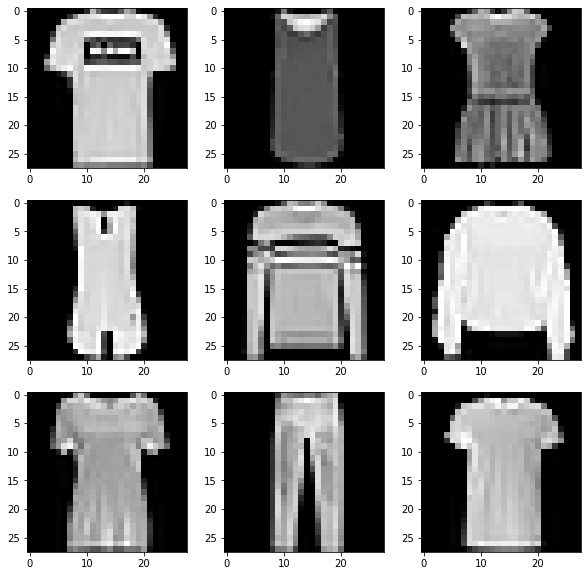

In [ ]:
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
for i in range(9):
    axs[i].imshow(X[i], cmap=pyplot.get_cmap('gray'))

In [ ]:
# Your code starts here

# Your solution:

# Q3: UMAP (25pt)
Implement UMAP on the previous dataset and embed the data on 2D and 3D. Please plot your result with the various setting for `n_neigh` and `min_dist` parameters. 

- Compare the performance with t-SNE. How much more global structure is preserved with UMAP, particularly with larger values of `n_neigh`. 


- Compare the run-time with t-SNE. How much faster is UMAP algorithm than t-SNE. 




In [ ]:
# Your code starts here

# Your solution: